# K Means

In [7]:
import matplotlib.pyplot as plt
   ...: from sklearn.datasets import make_blobs
   ...: from sklearn.cluster import KMeans
   ...: from sklearn.metrics import silhouette_score
   ...: from sklearn.preprocessing import StandardScaler

In [30]:
import numpy as np

In [308]:
from kneed import KneeLocator

In [12]:
import os

In [13]:
os.chdir("/Users/JackVoigt/Documents/MSIA Files/Datasets")

In [325]:
import warnings
warnings.filterwarnings('ignore')

In [310]:
os.getcwd()

'/Users/JackVoigt/Documents/MSIA Files/Datasets'

In [187]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [188]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [189]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [190]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [191]:
scaled_features[0:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [192]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

In [194]:
kmeans.fit(scaled_features)

In [197]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [198]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [199]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [200]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

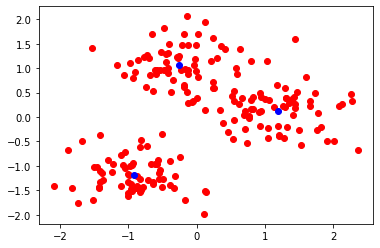

In [203]:
plt.scatter(scaled_features[:,0], scaled_features[:,1], c = "r")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "b")

In [208]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

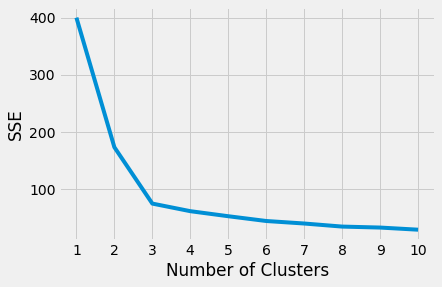

In [209]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [210]:
# Iris

In [222]:
iris = pd.read_csv('iris.csv')
iris = iris.drop("Id", axis = 1)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [244]:
X = iris.iloc[:, 0:4]

In [245]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [251]:
kmeans5 = KMeans(n_clusters=5,max_iter=300)

In [252]:
y_kmeans5 = kmeans5.fit_predict(X)

In [253]:
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 0 0 4 0 4 4 0 4 0 4 0 0 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 2 0 3 2 2 3 4 3 2 3 2
 2 2 0 2 2 2 3 3 0 2 0 3 0 2 3 0 0 2 3 3 3 2 0 0 3 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [255]:
X["cluster"] = y_kmeans5

In [259]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [262]:
kmeans5.cluster_centers_

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ]])

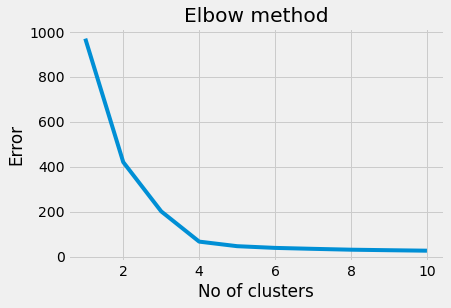

In [263]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    Error.append(kmeans.inertia_)


plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [264]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(X)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 0 2 0 0 2 0 2 0 2 2 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [268]:
kmeans3.cluster_centers_.round(decimals=5)

array([[ 6.29672,  2.88361,  5.0082 ,  1.74754,  3.01639],
       [ 5.006  ,  3.418  ,  1.464  ,  0.244  ,  1.     ],
       [ 6.20769,  2.85385,  4.74615,  1.5641 , -0.     ]])

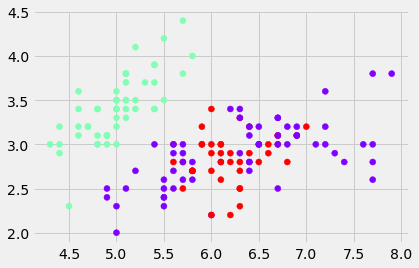

In [279]:
plt.scatter(X["SepalLengthCm"], X["SepalWidthCm"], c = y_kmeans3, cmap = "rainbow")

## Customer Segmentation Analysis 

In [3]:
import seaborn as sns 
import warnings

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly as py 
import plotly.graph_objs as go

In [6]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.

In [9]:
import pandas as pd

In [14]:
cust = pd.read_csv('Mall_Customers.csv')
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
cust.shape

(200, 5)

In [18]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
cust.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [20]:
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [21]:
cust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
plt.style.use('fivethirtyeight')

## Exploration Visuals

/Users/JackVoigt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JackVoigt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JackVoigt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

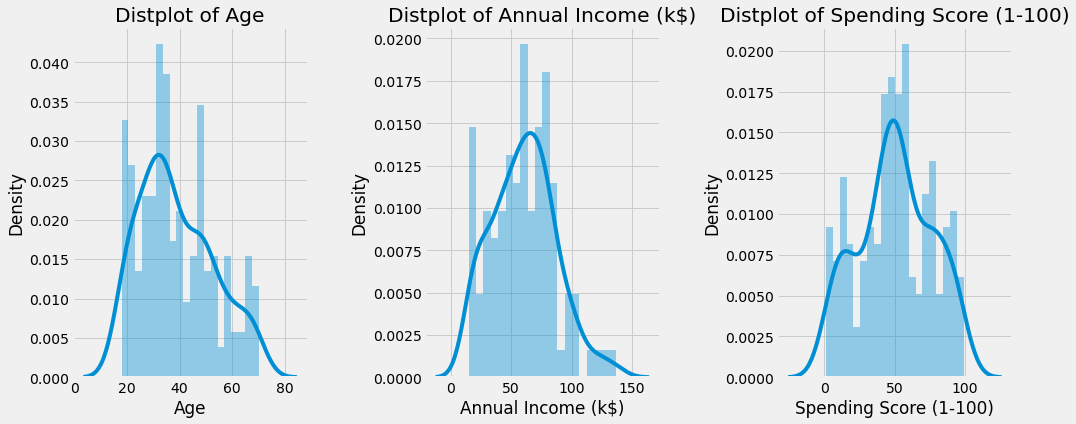

In [23]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3, n)
    plt.subplots_adjust(hspace =0.5, wspace = 0.5)
    sns.distplot(cust[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


In [24]:
cust["Age"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

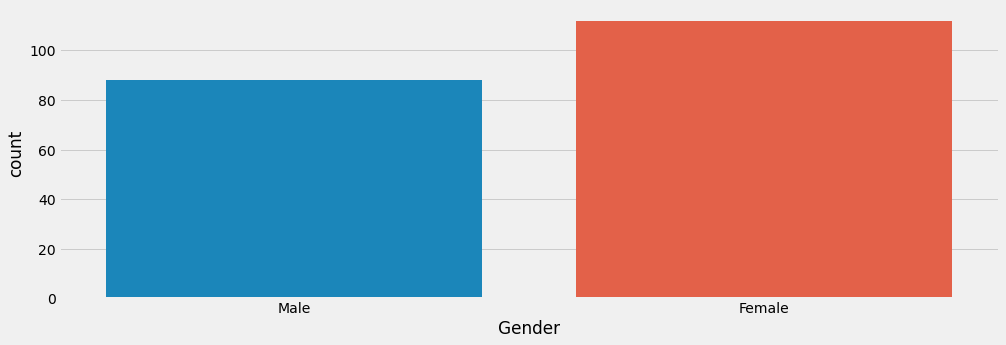

In [482]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x = 'Gender' , data = cust)
plt.show()

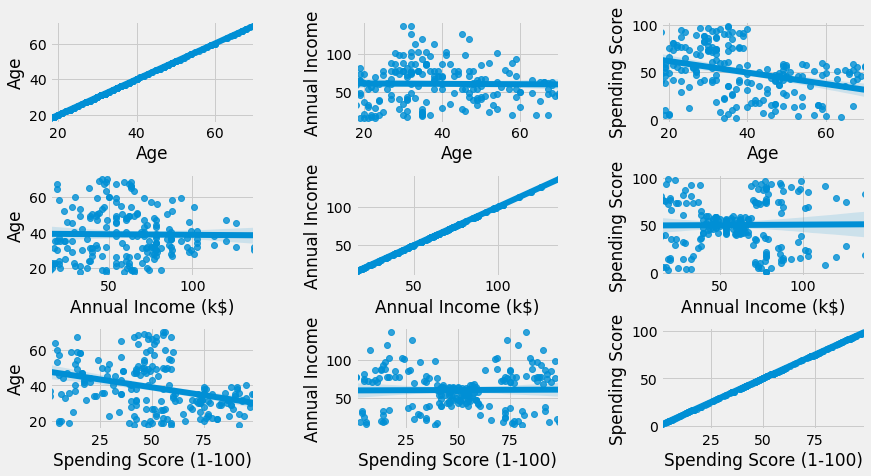

In [25]:
plt.figure(1 , figsize = (13 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x , y = y , data = cust)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

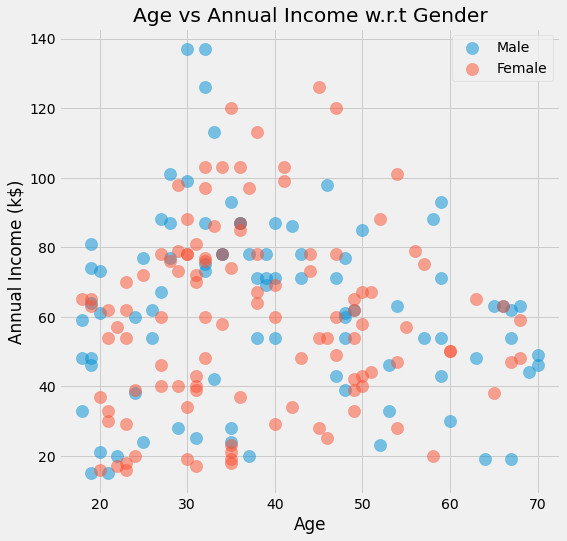

In [26]:
plt.figure(1 , figsize = (8 , 8))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = cust[cust['Gender'] == gender] ,
                s = 150 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

## Clustering

In [27]:
X1 = cust[['Age' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='random', n_init = 10, max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/Users/JackVoigt/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


In [28]:
print(inertia)

[171535.50000000003, 75949.15601023012, 45840.67661610871, 28165.583566629342, 23818.41168818787, 19576.013221355326, 15514.193134351033, 13180.95454661826, 11617.099715274782, 10925.954095935353]


### Visualize Inertia at different Ks

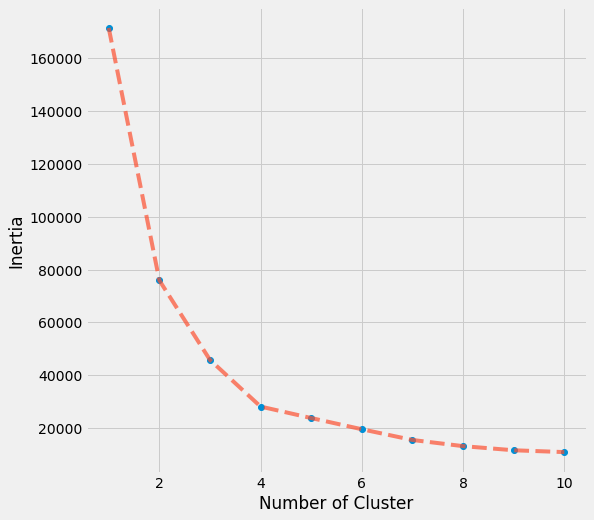

In [31]:
plt.figure(1, figsize = (8 ,8))
plt.plot(np.arange(1 , 11) , inertia , "o")
plt.plot(np.arange(1 , 11) , inertia , '--' , alpha = 0.7)
plt.xlabel('Number of Cluster') , plt.ylabel('Inertia')
plt.show()

### Set algorithm parameters

In [32]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [33]:
print(labels1)
print("\n")
print(centroids1)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


## Scatterplots

In [34]:
c1 = centroids1[0,:]
print(c1)

[55.70833333 48.22916667]


In [35]:
c2 = centroids1[1,:]
print(c2)

[30.1754386  82.35087719]


In [36]:
c3 = centroids1[2,:]
print(c3)

[43.29166667 15.02083333]


In [37]:
c4 = centroids1[3,:]
print(c4)

[27.61702128 49.14893617]


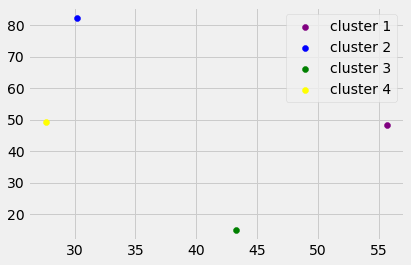

In [38]:
cp1 = plt.scatter(c1[0], c1[1], c = "purple")
cp2 = plt.scatter(c2[0], c2[1], c = "blue")
cp3 = plt.scatter(c3[0], c3[1], c = "green")
cp4 = plt.scatter(c4[0], c4[1], c = "yellow")
plt.legend((cp1, cp2, cp3, cp4), ("cluster 1", "cluster 2", "cluster 3", "cluster 4"))

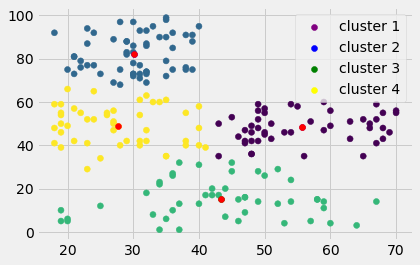

In [39]:
plt.scatter(X1["Age"], X1["Spending Score (1-100)"], c = labels1)
cp1 = plt.scatter(c1[0], c1[1], c = "purple")
cp2 = plt.scatter(c2[0], c2[1], c = "blue")
cp3 = plt.scatter(c3[0], c3[1], c = "green")
cp4 = plt.scatter(c4[0], c4[1], c = "yellow")
plt.legend((cp1, cp2, cp3, cp4), ("cluster 1", "cluster 2", "cluster 3", "cluster 4"))
plt.scatter(centroids1[:,0], centroids1[:,1],c = "r")
plt.show()

In [46]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [44]:
cust["labels"] = labels1
first_cluster = cust[cust["labels"] == 0]

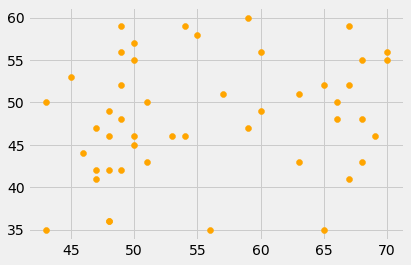

In [45]:
plt.scatter(data=first_cluster, x = "Age", y = "Spending Score (1-100)", c = "orange")